# Лабораторная работа 3

In [55]:
import os
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread, imsave
import pydicom

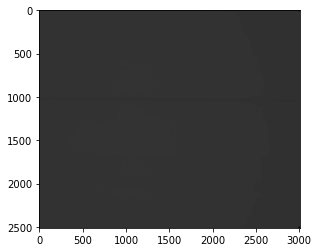

In [56]:
img = pydicom.dcmread('./data/0.063-1_2.5x_View2.dcm')
plt.imshow(img.pixel_array, cmap='gray')

Что-то видно, но ооочень плохо :(

In [57]:
print(f'Image shape: {img.pixel_array.shape}')
print(f'Pixel values range: {np.min(img.pixel_array), np.max(img.pixel_array)}')

Image shape: (2512, 3008)
Pixel values range: (0, 65535)


Отшкалируем наши значение на промежуток [0, 255].

Изобразим распределение значений пикселей изображения на гистограмме с количеством бинов 255. 

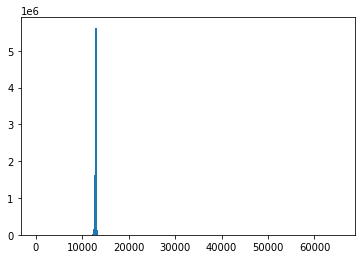

In [58]:
plt.hist(img.pixel_array.flatten(), bins=255)
plt.show()

Видим, что можем пренебречь значениями, которые лежат вне интервала [10000, 15000]. 

In [59]:
img_array = img.pixel_array

In [60]:
img_array[img_array < 10000] = 10000
img_array[img_array > 15000] = 15000

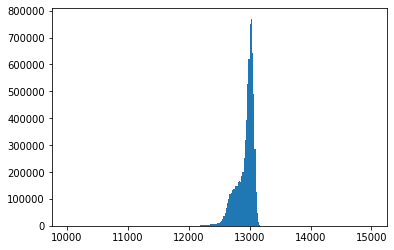

In [61]:
plt.hist(img_array.flatten(), bins=255)
plt.show()

Уменьшим ширину интервала до [12250, 13250] и посмотрим, что получится.

In [62]:
img_array[img_array < 12240] = 12240
img_array[img_array > 13260] = 13260

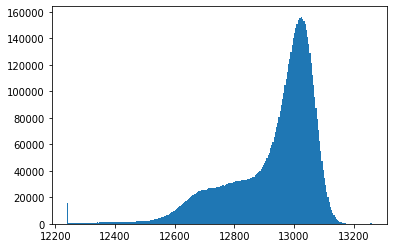

In [63]:
plt.hist(img_array.flatten(), bins=255)
plt.show()

In [64]:
low = 12240; high = 13260
img_array = np.float64(img_array)
img_array = (img_array - low) / (high - low)
img_array *= 255
img_array = np.clip(np.round(img_array), 0, 255)

In [65]:
print(f'Image shape: {img.pixel_array.shape}')
print(f'Pixel values range: {np.min(img_array), np.max(img_array)}')

Image shape: (2512, 3008)
Pixel values range: (0.0, 255.0)


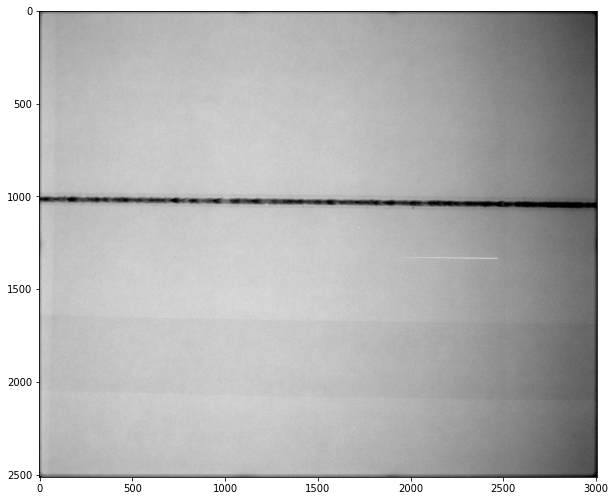

In [68]:
plt.figure(figsize=(10, 12))
plt.imshow(img_array, cmap="gray")